In [116]:
import os
import numpy as np
import matplotlib.pyplot as plt
from shutil import copyfile
from dask_accelerated import pickler

In [117]:
data = pickler.load_from_notebooks()

In [118]:
tidre = data['tidre']
timestamp = data['timestamp']

print("Run using tidre: ", tidre)
print("Data generated on", timestamp)

# Determing output path for generated plots
out_dir = './plots/'
if tidre:
    out_dir += 'tidre/'
else:
    out_dir += 're2/'
out_dir += timestamp

# Create the directory if it does not yet exist
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Copy the data file to the out dir as a backup
copyfile('./data.pickle', out_dir + '/data.pickle')

Run using tidre:  False
Data generated on 04-Apr-2021_23:22:26


'./plots/re2/04-Apr-2021_23:22:26/data.pickle'

In [119]:
# Helper function to make all plots in the notebook
def make_bar_plot(data, benchmark_name, contains_tidre, plot_title, axes_titles, log_scale, rotate_x_labels, plot_name):

    # Assumption that in_sizes benchmark is always run
    sizes = np.array(list(data[benchmark_name]['vanilla_filter'].keys()))

    vanilla = np.array(list(data[benchmark_name]['vanilla_filter'].values()))
    re2 = np.array(list(data[benchmark_name]['re2_filter'].values()))
    if contains_tidre:
        tidre = np.array(list(data[benchmark_name]['tidre_filter'].values()))

    # set width of bar
    barWidth = 0.25

    # set height of bar
    bars1 = vanilla
    bars2 = re2
    if contains_tidre:
        bars3 = tidre

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    if contains_tidre:
        r3 = [x + barWidth for x in r2]

    fig = plt.figure()
    fig.patch.set_facecolor('white')

    # Make the plot
    plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='vanilla dask', zorder=3)
    plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='dask + re2', zorder=3)
    if contains_tidre:
        plt.bar(r3, bars3, color='g', width=barWidth, edgecolor='white', label='dask + tidre', zorder=3)

    # Add xticks on the middle of the group bars
    plt.xlabel(axes_titles['x'])
    plt.ylabel(axes_titles['y'])

    if contains_tidre:
        x_offset = barWidth
    else:
        x_offset = barWidth / 2
    plt.xticks([r + (x_offset) for r in range(len(bars1))], sizes)

    if rotate_x_labels:
        plt.xticks(rotation=-90)

    plt.title(plot_title)

    axes = plt.gca()
    axes.grid(which='both', axis='y', linestyle='--')

    if log_scale:
        plt.yscale('log')

    # Create legend & Show graphic
    plt.legend()

    # Save fig as pdf
    plt.savefig(out_dir + '/' + plot_name + '.png')

    plt.show()

In [120]:
def make_line_plot(data, benchmark_name, contains_tidre, plot_title, axes_titles, log_scale, rotate_x_labels, plot_name, include_vanilla_re2=True):

    # Assumption that in_sizes benchmark is always run
    sizes = np.array(list(data[benchmark_name]['vanilla_filter'].keys()))

    if include_vanilla_re2:
        vanilla = np.array(list(data[benchmark_name]['vanilla_filter'].values()))
        re2 = np.array(list(data[benchmark_name]['re2_filter'].values()))
    if contains_tidre:
        tidre = np.array(list(data[benchmark_name]['tidre_filter'].values()))

    fig = plt.figure()
    fig.patch.set_facecolor('white')

    # Make the plot
    if include_vanilla_re2:
        plt.plot(sizes, vanilla, color='b', marker='o', label='vanilla dask', zorder=3)
        plt.plot(sizes, re2, color='r', marker='+', label='dask + re2', zorder=3)
    if contains_tidre:
        plt.plot(sizes, tidre, color='g', marker='x', label='dask + tidre', zorder=3)

    # Add xticks on the middle of the group bars
    plt.xlabel(axes_titles['x'])
    plt.ylabel(axes_titles['y'])

    plt.xticks(sizes)
    if rotate_x_labels:
        plt.xticks(rotation=-90)

    plt.title(plot_title)

    axes = plt.gca()
    axes.grid(which='both', axis='y', linestyle='--')

    if log_scale:
        plt.yscale('log')

    # Create legend & Show graphic
    plt.legend()

    # Save fig as pdf
    plt.savefig(out_dir + '/' + plot_name + '.png')

    plt.show()

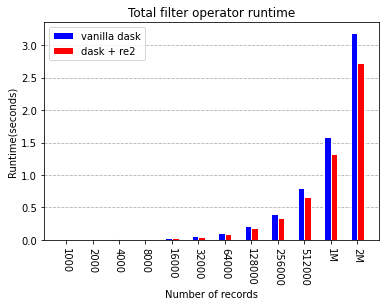

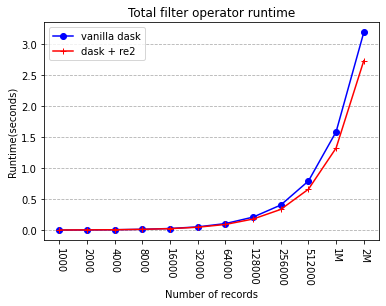

In [121]:
make_bar_plot(
    data,
    'in_size',                          # Name of the benchmark to plot
    tidre,                              # Whether or not tidre is benchmarked
    'Total filter operator runtime',    # Plot title
    {                                   # Axes titles
        'x': 'Number of records',
        'y': 'Runtime(seconds)'
    },
    False,                              # Plot y axis in log scale
    True,                               # Rotate x labels
    'bar_in_sizes'                      # Plot name
)

make_line_plot(
    data,
    'in_size',                          # Name of the benchmark to plot
    tidre,                              # Whether or not tidre is benchmarked
    'Total filter operator runtime',    # Plot title
    {                                   # Axes titles
        'x': 'Number of records',
        'y': 'Runtime(seconds)'
    },
    False,                              # Plot y axis in log scale
    True,                               # Rotate x labels
    'line_in_sizes'                     # Plot name
)

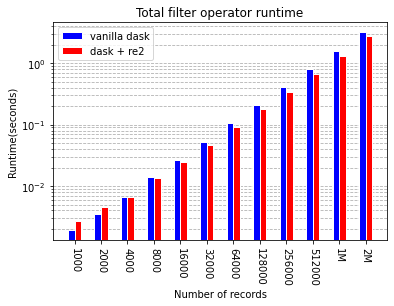

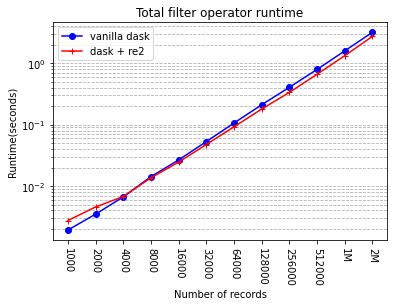

In [122]:
make_bar_plot(
    data,
    'in_size',                          # Name of the benchmark to plot
    tidre,                              # Whether or not tidre is benchmarked
    'Total filter operator runtime',    # Plot title
    {                                   # Axes titles
        'x': 'Number of records',
        'y': 'Runtime(seconds)'
    },
    True,                               # Plot y axis in log scale
    True,                               # Rotate x labels
    'bar_in_sizes_log'                  # Plot name
)

make_line_plot(
    data,
    'in_size',                          # Name of the benchmark to plot
    tidre,                              # Whether or not tidre is benchmarked
    'Total filter operator runtime',    # Plot title
    {                                   # Axes titles
        'x': 'Number of records',
        'y': 'Runtime(seconds)'
    },
    True,                               # Plot y axis in log scale
    True,                               # Rotate x labels
    'line_in_sizes_log'                 # Plot name
)

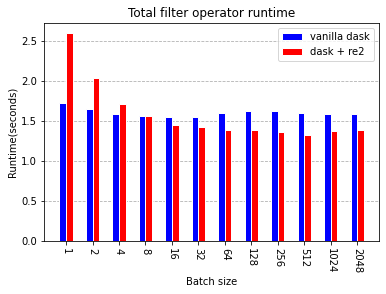

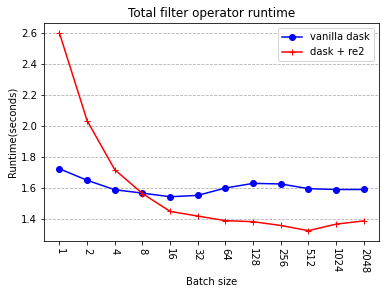

In [123]:
make_bar_plot(
    data,
    'batch_size',                       # Name of the benchmark to plot
    tidre,                              # Whether or not tidre is benchmarked
    'Total filter operator runtime',    # Plot title
    {                                   # Axes titles
        'x': 'Batch size',
        'y': 'Runtime(seconds)'
    },
    False,                              # Plot y axis in log scale
    True,                               # Rotate x labels
    'bar_batch_sizes'                   # Plot name
)

make_line_plot(
    data,
    'batch_size',                       # Name of the benchmark to plot
    tidre,                              # Whether or not tidre is benchmarked
    'Total filter operator runtime',    # Plot title
    {                                   # Axes titles
        'x': 'Batch size',
        'y': 'Runtime(seconds)'
    },
    False,                              # Plot y axis in log scale
    True,                               # Rotate x labels
    'line_batch_sizes'                  # Plot name
)


In [124]:
if tidre:
    make_line_plot(
        data,
        'batch_size',                       # Name of the benchmark to plot
        tidre,                              # Whether or not tidre is benchmarked
        'Total filter operator runtime',    # Plot title
        {                                   # Axes titles
            'x': 'Batch size',
            'y': 'Runtime(seconds)'
        },
        False,                              # Plot y axis in log scale
        True,                               # Rotate x labels
        'line_batch_sizes_tidre_only',      # Plot name
        False                               # Don't include vanilla and re2
    )